# Radar observation : reflectivity composite of the old product

The aim of this notebook is to indicate how to read the reflectivity data of the old product. These data range from 01/01/2016 to 30/10/18 included.

For each pixel is indicated a reflectivity value expressed in dBZ. If the value is missing, the value is 255.

In this notebook, a formula is provided to convert the dBz into mm.h<sup>-1</sup>.

# Quickstart

In [3]:
from data_exploration.utils.user_configuration import *
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 

In [4]:
####Cell containing the modifiable fields######
zone = "NW"
year = 2016
month = 8
decade = 3
fname = "../data_sample/radar/reflectivity_old_%s_%s_%s.%s.npz" % (zone, str(year),"{:02d}".format(month),str(decade))
fname_coords = "../data_sample/radar/radar_coords_%s.npz" % (zone)
ind = 1 #index of the chosen 5 min of the decade for the plot with basemap (cf last cell of the notebook)

#multiplication coefficient for the graphic representation of rainfall rate (in 1/coeff mm/h)
#/!\### the colorbar is adapted to the coefficient 10 (cf plot at the end)
coeff = 10      

In [5]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [6]:
def plot_reflectivity(fname, fname_coords, title = "4 examples of reflectivity plots"):
    ####data loading
    d = np.load(fname, allow_pickle=True)
    data = d['data']     #reflectivity values
    dates = d['dates']        #associated dates values
    miss_dates = d['miss_dates']        #missing dates values

    #get the coordinates of the points
    coords = np.load(fname_coords, allow_pickle=True)
    lat = coords['lats']
    lon = coords['lons']
    
    #plots
    fig, ax = plt.subplots(2, 2,figsize=(9,9))
    fig.suptitle(title, fontsize=16)

    if (np.max(data) > 56):
        borne_max = np.max(data)
    else:
        borne_max = 56 + 10
    cmap = colors.ListedColormap(['lavender','indigo','mediumblue','dodgerblue', 'skyblue','cyan',
                              'olivedrab','lime','greenyellow','orange','red','magenta','pink','silver'])
    bounds = [0,4,8,12,16,20,24,32,40,48,56,borne_max,255]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    pl=ax[0,0].pcolormesh(lon, lat, data[0,:,:],cmap=cmap, norm=norm)
    ax[0,0].set_ylabel('latitude (degrees_north)')
    ax[0,0].set_title(str(dates[0]) + " - "+  zone + " zone")

    pl=ax[0,1].pcolormesh(lon, lat, data[1,:,:],cmap=cmap, norm=norm)
    ax[0,1].set_title(str(dates[1]) + " - "+  zone + " zone")

    pl=ax[1,0].pcolormesh(lon, lat, data[2,:,:],cmap=cmap, norm=norm)
    ax[1,0].set_xlabel('longitude (degrees_east)')
    ax[1,0].set_ylabel('latitude (degrees_north)')
    ax[1,0].set_title(str(dates[2]) + " - "+  zone + " zone")

    pl=ax[1,1].pcolormesh(lon, lat, data[3,:,:],cmap=cmap, norm=norm)
    ax[1,1].set_xlabel('longitude (degrees_east)')
    ax[1,1].set_title(str(dates[3]) + " - "+  zone + " zone")

    cbar = fig.colorbar(pl,ax=ax.ravel().tolist(),cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'vertical').set_label('Reflectivity (in dBZ) / '+ str(255) +' : missing values')
    plt.show()
    return data, dates, miss_dates, lat, lon

<IPython.core.display.Javascript object>


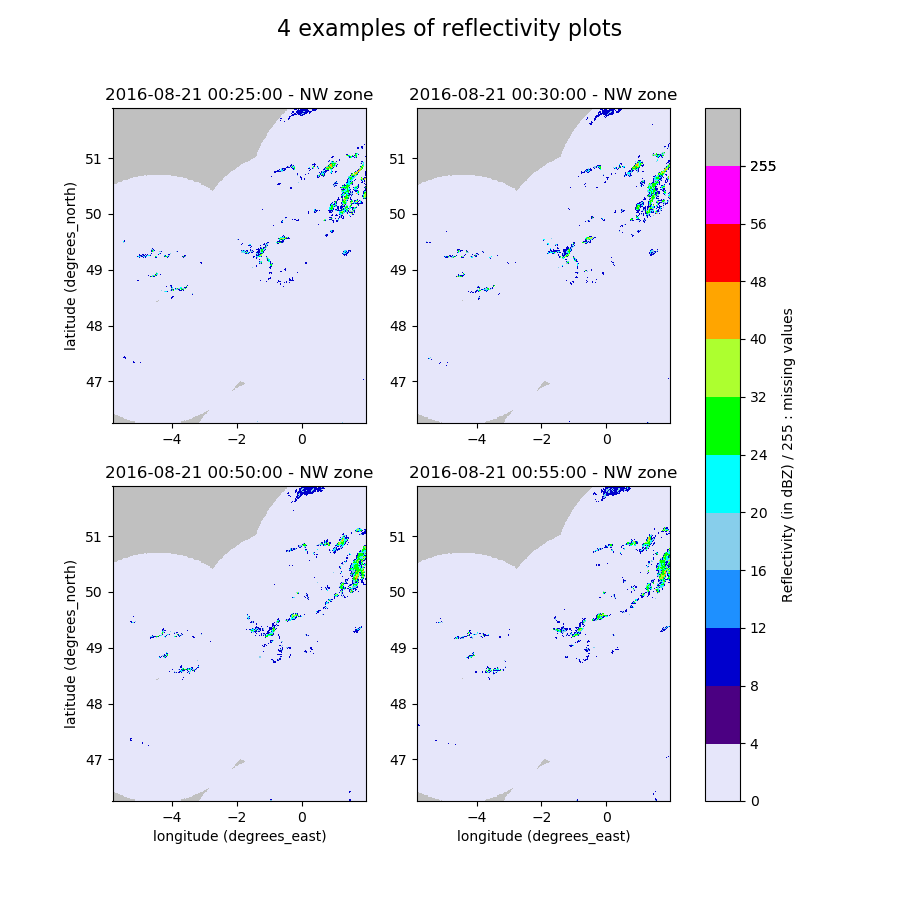

In [7]:
data, dates, miss_dates, lat, lon = plot_reflectivity(fname, fname_coords)

# More details

The data are stored per period of 10 or 11 days per geographic zone (each month is separated in 3 files). The zones called 'NW' (for North-West of France) and 'SE' (for South-East of France).
The time step is 5 min (per day, start hour :00h and end hour : 23h55), the spatial resolution, 0.01° (the projection system is EPSG:4326).

Each file contains 3 data categories : 
<ul>
    <li>'data' : rainfall values </li>
    <li>'dates' : the associated dates to the rainfall values</li>
    <li>'miss_dates' : the dates for which the data are missing</li>
</ul>

The values are not continuous, there are defined in this way (each value is the inferior bound of each interval) :
<ul>
    <li>0 : Z < 8 dBZ </li>
    <li>8 : 8 < Z < 16 dBZ  </li>   
    <li>16 : 16 < Z < 20 dBZ </li>
    <li>...</li>
    <li>70 : 70 dBZ < Z </li>
</ul>

**To get the coordinates (lat,lon) of the points :**
One npz file contains 2 arrays : one for the latitudes and one for the longitudes.

Dimensions of the 'data' array: 
<ul>
<li>time dimension (number of 5 min records)</li> 
<li>points number for longitude</li>
<li>points number for latitude</li>
</ul>      

In [7]:
data.shape

(29, 565, 784)

Dimensions of the 'dates' array:
<ul>
    <li>time dimension (number of 5 min records for which there are data)</li>
</ul>

In [8]:
dates.shape

(29,)

Dimensions of the 'miss_dates' array:
<ul>
    <li>time dimension (dates for which there are no data)</li>
</ul>

In [9]:
miss_dates.shape

(3139,)

Overview of data of type int16

In [10]:
data

array([[[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       ...,

       [[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0

Overview of 'dates' of type datetime.datetime

In [11]:
dates

array([datetime.datetime(2016, 8, 21, 0, 25),
       datetime.datetime(2016, 8, 21, 0, 30),
       datetime.datetime(2016, 8, 21, 0, 50),
       datetime.datetime(2016, 8, 21, 0, 55),
       datetime.datetime(2016, 8, 21, 1, 0),
       datetime.datetime(2016, 8, 21, 1, 5),
       datetime.datetime(2016, 8, 21, 1, 10),
       datetime.datetime(2016, 8, 25, 14, 45),
       datetime.datetime(2016, 8, 25, 14, 50),
       datetime.datetime(2016, 8, 25, 14, 55),
       datetime.datetime(2016, 8, 25, 15, 0),
       datetime.datetime(2016, 8, 25, 15, 10),
       datetime.datetime(2016, 8, 25, 15, 15),
       datetime.datetime(2016, 8, 25, 15, 20),
       datetime.datetime(2016, 8, 25, 15, 40),
       datetime.datetime(2016, 8, 25, 15, 45),
       datetime.datetime(2016, 8, 25, 15, 50),
       datetime.datetime(2016, 8, 25, 16, 0),
       datetime.datetime(2016, 8, 30, 22, 50),
       datetime.datetime(2016, 8, 30, 22, 55),
       datetime.datetime(2016, 8, 30, 23, 30),
       datetime.datetime

Overview of 'miss_dates' of type datetime.datetime

In [12]:
miss_dates

array([datetime.datetime(2016, 8, 21, 0, 0),
       datetime.datetime(2016, 8, 21, 0, 5),
       datetime.datetime(2016, 8, 21, 0, 10), ...,
       datetime.datetime(2016, 8, 31, 23, 15),
       datetime.datetime(2016, 8, 31, 23, 25),
       datetime.datetime(2016, 8, 31, 23, 30)], dtype=object)

Overview of latitudes:

In [13]:
lat

array([[51.896, 51.896, 51.896, ..., 51.896, 51.896, 51.896],
       [51.886, 51.886, 51.886, ..., 51.886, 51.886, 51.886],
       [51.876, 51.876, 51.876, ..., 51.876, 51.876, 51.876],
       ...,
       [46.276, 46.276, 46.276, ..., 46.276, 46.276, 46.276],
       [46.266, 46.266, 46.266, ..., 46.266, 46.266, 46.266],
       [46.256, 46.256, 46.256, ..., 46.256, 46.256, 46.256]])

# Nice view using Basemap

Plot the reflectivity values for 1 given time step

In [14]:
def plot_reflectivity_with_basemap(ind,data,dates,zone):
    fig,ax=plt.subplots(1,1,figsize=(10,12))

    #background map definition : coordinates of corners, resolution, projection type
    m = Basemap(epsg=n_epsg,resolution='i', # You can change the resolution of the contours here
                llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

    #colorbar definition
    if (np.max(data) > 56):
        borne_max = np.max(data)
    else:
        borne_max = 56 + 10
    cmap = colors.ListedColormap(['lavender','indigo','mediumblue','dodgerblue', 'skyblue','cyan',
                              'olivedrab','lime','greenyellow','orange','red','magenta','pink','silver'])
    bounds = [0,4,8,12,16,20,24,32,40,48,56,borne_max,255]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    #plot the data and the background map (coastlines and borders)
    m.drawcoastlines()
    m.drawcountries()
    img=m.imshow(data[ind,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm)
    plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Reflectivity (in dBZ) / '+ 
                                                                                                              str(255) +' : missing values')
    plt.title("Reflectivity - "+ str(dates[ind]) + " - "+  zone + " zone")
    plt.show()

<IPython.core.display.Javascript object>


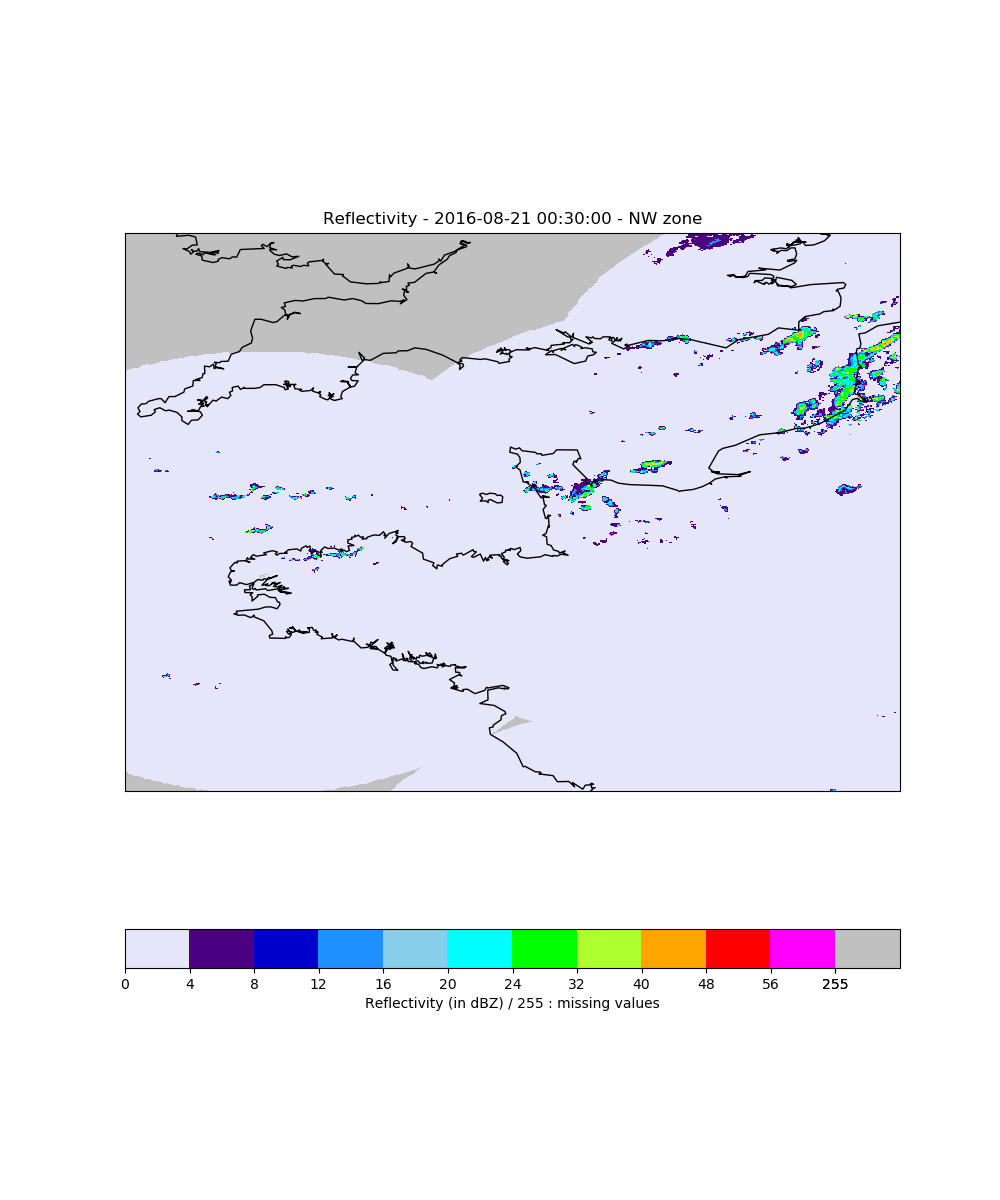

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [15]:
plot_reflectivity_with_basemap(ind,data,dates,zone)

# Convert dBZ into mm/h

In [21]:
def plot_mmh(data,coeff, lat,lon, title = "4 examples of rainfall rate plots"):
        
    ##from dBZ to mm/h : Marshall-Palmer formula
    a = 200
    b = 1.6

    rr = np.zeros((data.shape[0],data.shape[1],data.shape[2]))
    rr[data==255]=np.nan
    rr[data!=255] = (10**(data[data!=255]/10)/a)**(1/b)
    
    rr_plot = coeff*rr
    
    #plots
    fig, ax = plt.subplots(2, 2,figsize=(9,9))
    fig.suptitle(title, fontsize=16)
    
    #colorbar definition
    #/!\### the scale is adapted to the coefficient 10
    if (np.nanmax(rr_plot) > 3646):
        borne_max = np.nanmax(rr_plot)
    else:
        borne_max = 3646 + 10
    cmap = colors.ListedColormap(['white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                      ,'cyan','lime','yellow','khaki','burlywood','orange','brown','red'])
    bounds = [0,2,4,6,12,21,36,65,115,205,365,648,1153,2050,3646,borne_max]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    pl=ax[0,0].pcolormesh(lon, lat, rr_plot[0,:,:],cmap=cmap, norm=norm)
    ax[0,0].set_ylabel('latitude (degrees_north)')
    ax[0,0].set_title(str(dates[0]) + " - "+  zone + " zone")

    pl=ax[0,1].pcolormesh(lon, lat, rr_plot[1,:,:],cmap=cmap, norm=norm)
    ax[0,1].set_title(str(dates[1]) + " - "+  zone + " zone")

    pl=ax[1,0].pcolormesh(lon, lat, rr_plot[2,:,:],cmap=cmap, norm=norm)
    ax[1,0].set_xlabel('longitude (degrees_east)')
    ax[1,0].set_ylabel('latitude (degrees_north)')
    ax[1,0].set_title(str(dates[2]) + " - "+  zone + " zone")

    pl=ax[1,1].pcolormesh(lon, lat, rr_plot[3,:,:],cmap=cmap, norm=norm)
    ax[1,1].set_xlabel('longitude (degrees_east)')
    ax[1,1].set_title(str(dates[3]) + " - "+  zone + " zone")

    cbar = fig.colorbar(pl,ax=ax.ravel().tolist(),cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'vertical').set_label('Rainfall rate (in 1/10 mm/h) / nan : missing values')
    plt.show()
    return rr

<IPython.core.display.Javascript object>


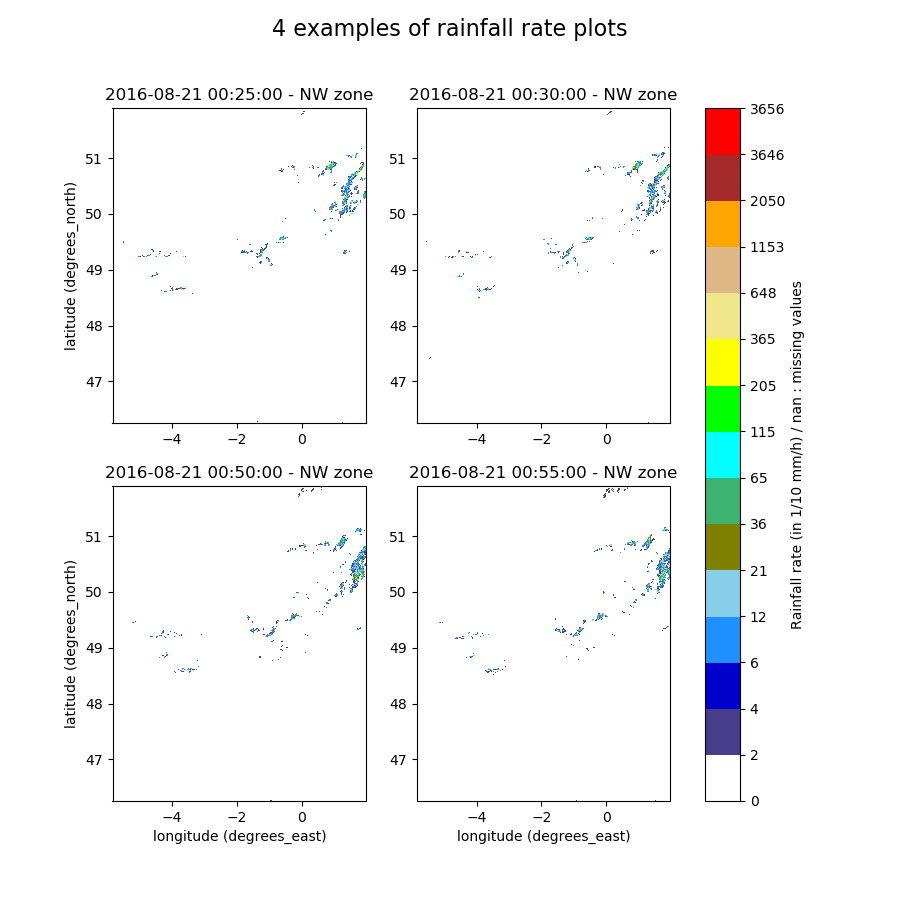

In [22]:
rr = plot_mmh(data,coeff, lat,lon)

In [23]:
def plot_mmh_with_basemap(ind,coeff,rr,dates,zone):
    
    data_plot = coeff*rr
    fig,ax=plt.subplots(1,1,figsize=(10,12))

    #background map definition : coordinates of corners, resolution, projection type
    m = Basemap(epsg=n_epsg,resolution='i', # You can change the resolution of the contours here
                llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

    #colorbar definition
    #/!\### the scale is adapted to the coefficient 10
    if (np.nanmax(data_plot) > 3646):
        borne_max = np.nanmax(data_plot)
    else:
        borne_max = 3646 + 10
    cmap = colors.ListedColormap(['white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                      ,'cyan','lime','yellow','khaki','burlywood','orange','brown','red'])
    bounds = [0,2,4,6,12,21,36,65,115,205,365,648,1153,2050,3646,borne_max]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #plot the data and the background map (coastlines and borders)
    m.drawcoastlines()
    m.drawcountries()
    img=m.imshow(data_plot[ind,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm)
    plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Rainfall rate (in 1/10 mm/h) / nan : missing values')
    plt.title("Rainfall rate - "+ str(dates[ind]) + " - "+  zone + " zone")
    plt.show()

<IPython.core.display.Javascript object>


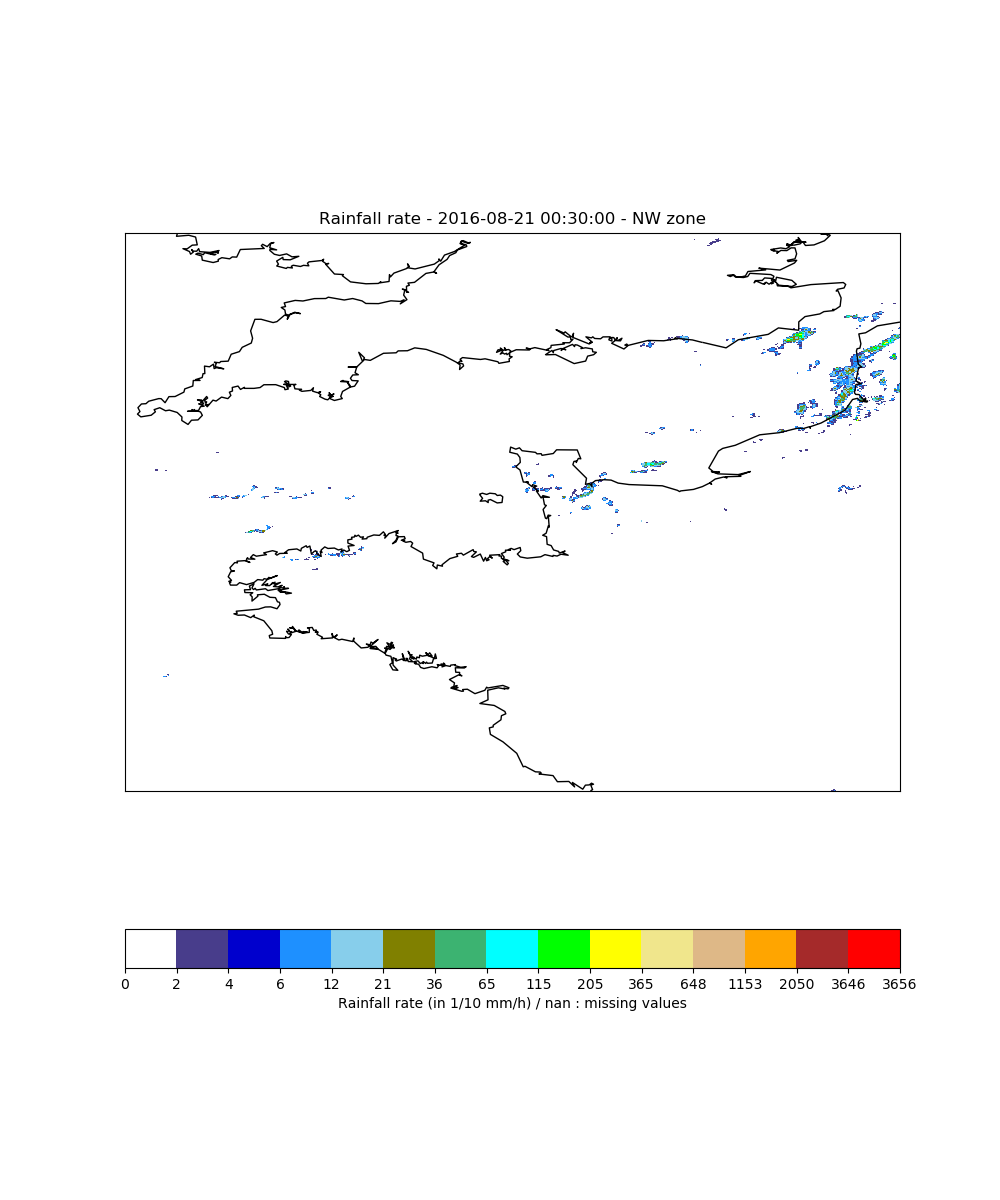

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [24]:
plot_mmh_with_basemap(ind,coeff,rr,dates,zone)

In [ ]:
d.fid.close()